In [65]:
import sklearn.metrics as skm
import sys
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm



ssl_final_block_train = np.load("./old_but_full_features/self_supervised_cifar100/features_train2.npy")
#ssl_3rd_block_train = np.load("./self_supervised_cifar100/train_3rd_block.npy") 
#ssl_2nd_block_train = np.load("./self_supervised_cifar100/train_2nd_block.npy") 
# ssl_1st_block_train = np.load("./self_supervised_cifar100/train_1st_block.npy") 
ssl_labels_train = np.load("./old_but_full_features/self_supervised_cifar100/labels_train2.npy")  

sl_final_block_train = np.load("./old_but_full_features/supervised_cifar100/features_train2.npy")
#sl_3rd_block_train = np.load("./supervised_cifar100/train_3rd_block.npy") 
#sl_2nd_block_train = np.load("./supervised_cifar100/train_2nd_block.npy") 
# sl_1st_block_train = np.load("./supervised_cifar100/train_1st_block.npy") 
sl_labels_train = np.load("./old_but_full_features/supervised_cifar100/labels_train2.npy") 

cl_final_block_train = np.load("./supervised_contrastive_cifar10/features_train2.npy")
#sl_3rd_block_train = np.load("./supervised_cifar100/train_3rd_block.npy") 
#sl_2nd_block_train = np.load("./supervised_cifar100/train_2nd_block.npy") 
# sl_1st_block_train = np.load("./supervised_cifar100/train_1st_block.npy") 
cl_labels_train = np.load("./supervised_contrastive_cifar10/labels_train2.npy") 

ds_final_block_train = np.load("./distillation/features_train2.npy")
#sl_3rd_block_train = np.load("./supervised_cifar100/train_3rd_block.npy") 
#sl_2nd_block_train = np.load("./supervised_cifar100/train_2nd_block.npy") 
# sl_1st_block_train = np.load("./supervised_cifar100/train_1st_block.npy") 
ds_labels_train = np.load("./dsitillation/labels_train2.npy") 

# tsne = TSNE(n_components=2).fit_transform(ssl_features_train2)
# ssl_embedding_1 = ssl_1st_block_train
#print(ssl_2nd_block_train.shape)
#ssl_embedding_2 = ssl_2nd_block_train.reshape(5000, -1)[:1000]
#ssl_embedding_3 = ssl_3rd_block_train.reshape(5000, -1)[:1000]
ssl_embedding_4 = ssl_final_block_train.reshape(50000, -1)[:1000]
#print(ssl_embedding_4.size)
ssl_labels = ssl_labels_train[:1000]

# sl_embedding_1 = sl_1st_block_train
#sl_embedding_2 = sl_2nd_block_train.reshape(50000, -1)[:1000]
#sl_embedding_3 = sl_3rd_block_train.reshape(50000, -1)[:1000]
sl_embedding_4 = sl_final_block_train.reshape(50000, -1)[:1000]
sl_labels = sl_labels_train[:1000]

cl_embedding_4 = cl_final_block_train.reshape(50000, -1)[:1000]
cl_labels = cl_labels_train[:1000]

ds_embedding_4 = cl_final_block_train.reshape(50000, -1)[:1000]
ds_labels = cl_labels_train[:1000]

ssl_features_ood = np.load("./old_but_full_features/self_supervised_cifar100/features_ood2.npy")
#ssl_labels_ood = np.load("./supervised_cifar100/labels_ood.npy") 

sl_features_ood = np.load("./old_but_full_features/supervised_cifar100/features_ood2.npy")
#sl_labels_ood = np.load("./supervised_cifar100/labels_ood.npy") 

cl_features_ood = np.load("./supervised_contrastive_cifar10/features_ood.npy")
#sl_3rd_block_train = np.load("./supervised_cifar100/train_3rd_block.npy") 
#sl_2nd_block_train = np.load("./supervised_cifar100/train_2nd_block.npy") 
# sl_1st_block_train = np.load("./supervised_cifar100/train_1st_block.npy") 
#cl_labels_ood = np.load("./supervised_contrastive_cifar10/labels_ood.npy") 

print(ssl_features_ood.shape)
#print(ssl_labels_ood.shape)
# ssl_embedding = ssl_features_ood.reshape(5000, -1)[:1000]

ssl_embedding_4_ood = ssl_features_ood.reshape(10000, -1)[:1000]
#print(ssl_embedding_4.size)
ssl_labels_ood = np.zeros(1000)+10



# sl_embedding_1 = sl_1st_block_train
#sl_embedding_2 = sl_2nd_block_train.reshape(50000, -1)[:1000]
#sl_embedding_3 = sl_3rd_block_train.reshape(50000, -1)[:1000]
sl_embedding_4_ood = sl_features_ood.reshape(10000, -1)[:1000]
#sl_labels = sl_labels_train[:1000]

cl_embedding_4_ood = cl_features_ood.reshape(10000, -1)[:1000]

ssl_embedding_4 = np.concatenate((ssl_embedding_4, ssl_embedding_4_ood))
sl_embedding_4 = np.concatenate((sl_embedding_4, sl_embedding_4_ood))
cl_embedding_4 = np.concatenate((cl_embedding_4, cl_embedding_4_ood))

ssl_labels = np.concatenate((ssl_labels, ssl_labels_ood))
sl_labels = np.concatenate((sl_labels, ssl_labels_ood))
cl_labels = np.concatenate((cl_labels, ssl_labels_ood))

print(ssl_embedding_4.shape)


(10000, 2048)
(2000, 2048)


/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.119s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.798089
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.958763
[t-SNE] KL divergence after 1000 iterations: 1.106561


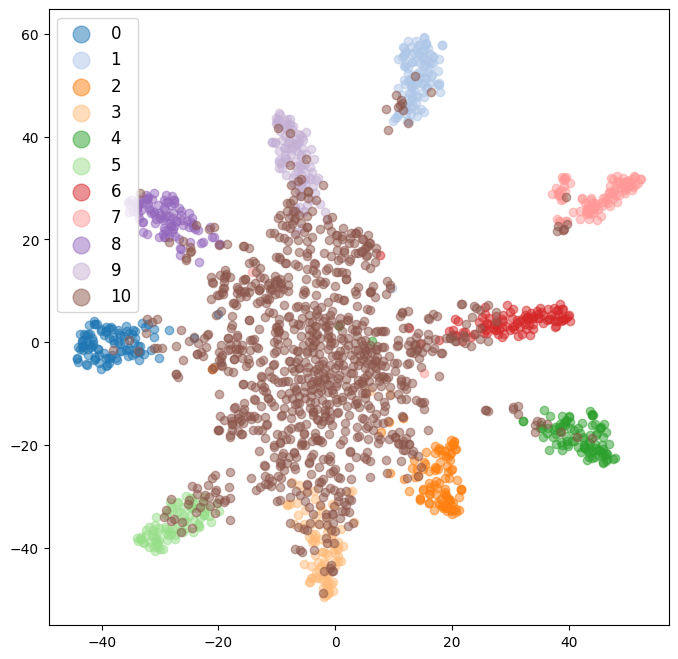

In [66]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(cl_embedding_4)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 11
for lab in range(num_categories):
    indices = cl_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.168730
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.084106
[t-SNE] KL divergence after 1000 iterations: 1.046952


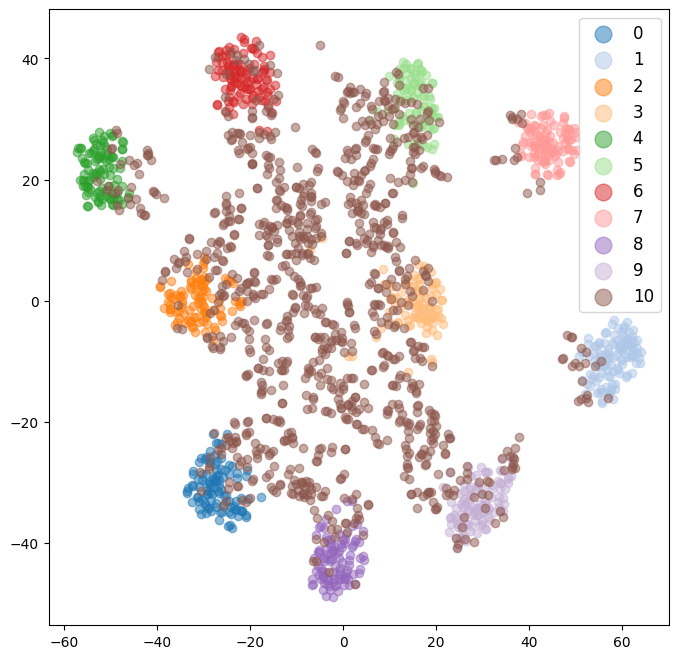

In [67]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(sl_embedding_4)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 11
for lab in range(num_categories):
    indices = ssl_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.599953
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.042046
[t-SNE] KL divergence after 1000 iterations: 1.972164


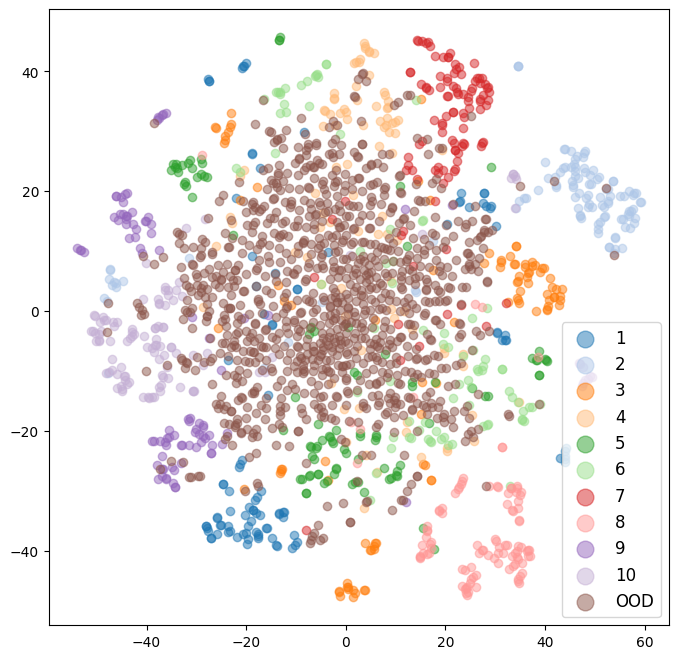

In [72]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(ssl_embedding_4)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 11
for lab in range(num_categories):
    indices = ssl_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(['1','2','3','4','5','6','7','8','9','10','OOD'],fontsize='large', markerscale=2)
plt.show()

# con_embedding = np.concatenate((sp_embedding, ssl_embedding), axis = 1)
con_embedding = 0.2 * sl_embedding_4 + 0.6 * ssl_embedding_4 + 0.2 * cl_embedding_4
print(con_embedding.shape)
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(con_embedding)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 10
for lab in range(num_categories):
    indices = ssl_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()


(2000, 2048)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.121s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.836736


/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.642006
[t-SNE] KL divergence after 1000 iterations: 0.993594


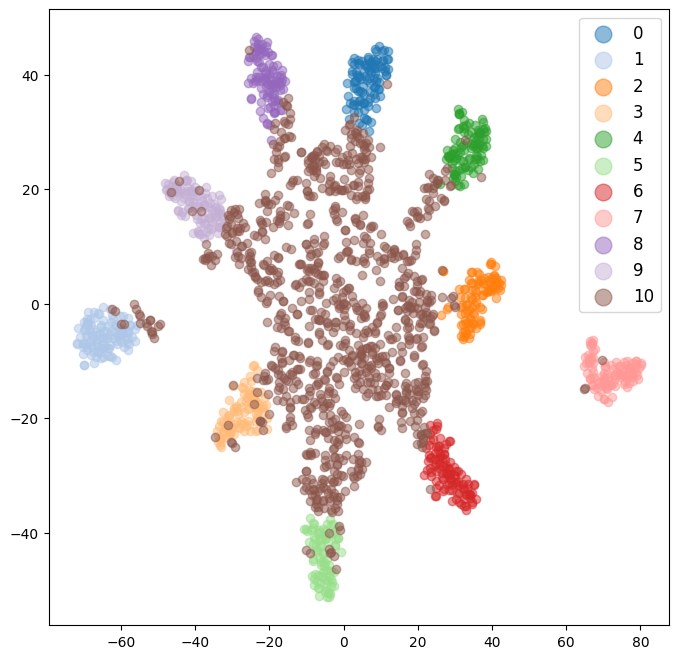

In [63]:
# con_embedding = np.concatenate((sp_embedding, ssl_embedding), axis = 1)
con_embedding = 0.5 * sl_embedding_4 + 0 * ssl_embedding_4 + 0.5 * cl_embedding_4
print(con_embedding.shape)
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(con_embedding)
# Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 11
for lab in range(num_categories):
    indices = ssl_labels==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()


In [24]:
import sklearn.metrics as skm
import sys
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm
ssl_features_ood = np.load("./old_but_full_features/self_supervised_cifar100/features_ood2.npy")
ssl_labels_ood = np.load("./supervised_cifar100/labels_ood.npy") 

sl_features_ood = np.load("./old_but_full_features/supervised_cifar100/features_ood2.npy")
sl_labels_ood = np.load("./supervised_cifar100/labels_ood.npy") 

cl_features_ood = np.load("./supervised_contrastive_cifar10/features_ood.npy")
#sl_3rd_block_train = np.load("./supervised_cifar100/train_3rd_block.npy") 
#sl_2nd_block_train = np.load("./supervised_cifar100/train_2nd_block.npy") 
# sl_1st_block_train = np.load("./supervised_cifar100/train_1st_block.npy") 
cl_labels_ood = np.load("./supervised_contrastive_cifar10/labels_ood.npy") 

print(ssl_features_ood.shape)
print(ssl_labels_ood.shape)
# ssl_embedding = ssl_features_ood.reshape(5000, -1)[:1000]

ssl_embedding_4_ood = ssl_features_ood.reshape(10000, -1)[:1000]
#print(ssl_embedding_4.size)
ssl_labels_ood = np.zeros(1000)+10



# sl_embedding_1 = sl_1st_block_train
#sl_embedding_2 = sl_2nd_block_train.reshape(50000, -1)[:1000]
#sl_embedding_3 = sl_3rd_block_train.reshape(50000, -1)[:1000]
sl_embedding_4_ood = sl_features_ood.reshape(10000, -1)[:1000]
#sl_labels = sl_labels_train[:1000]

cl_embedding_4_ood = cl_features_ood.reshape(10000, -1)[:1000]
#cl_labels = cl_labels_train[:1000]

#ssl_labels = ssl_labels_ood

#print(sl_features_ood.shape)
# sl_embedding = sl_features_ood
#sl_labels = sl_labels_ood


(10000, 2048)
(10000,)
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10.

/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.421502
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.828117
[t-SNE] KL divergence after 1000 iterations: 3.171468


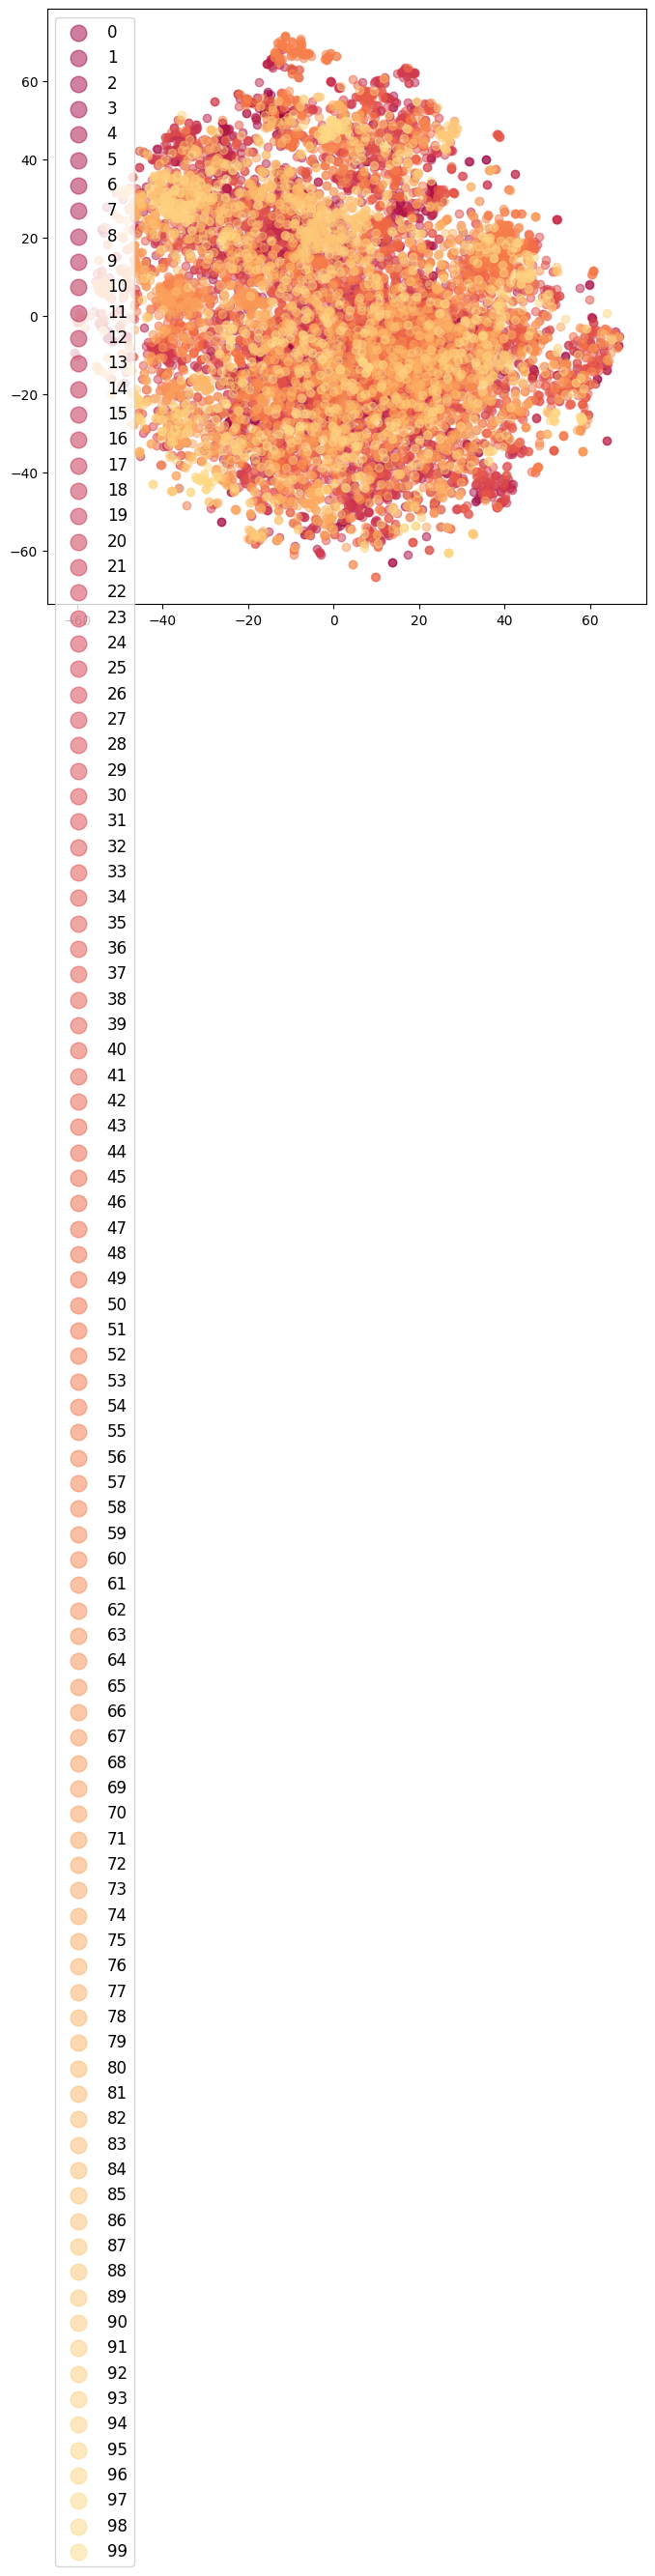

In [21]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(ssl_features_ood)
# Plot those points as a scatter plot and label them based on the pred labels
# cmap = cm.get_cmap('tab20')
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 100
for lab in range(num_categories):
    indices = ssl_labels ==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()

/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/chenhui/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.854s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.048773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.835220
[t-SNE] KL divergence after 1000 iterations: 2.256926


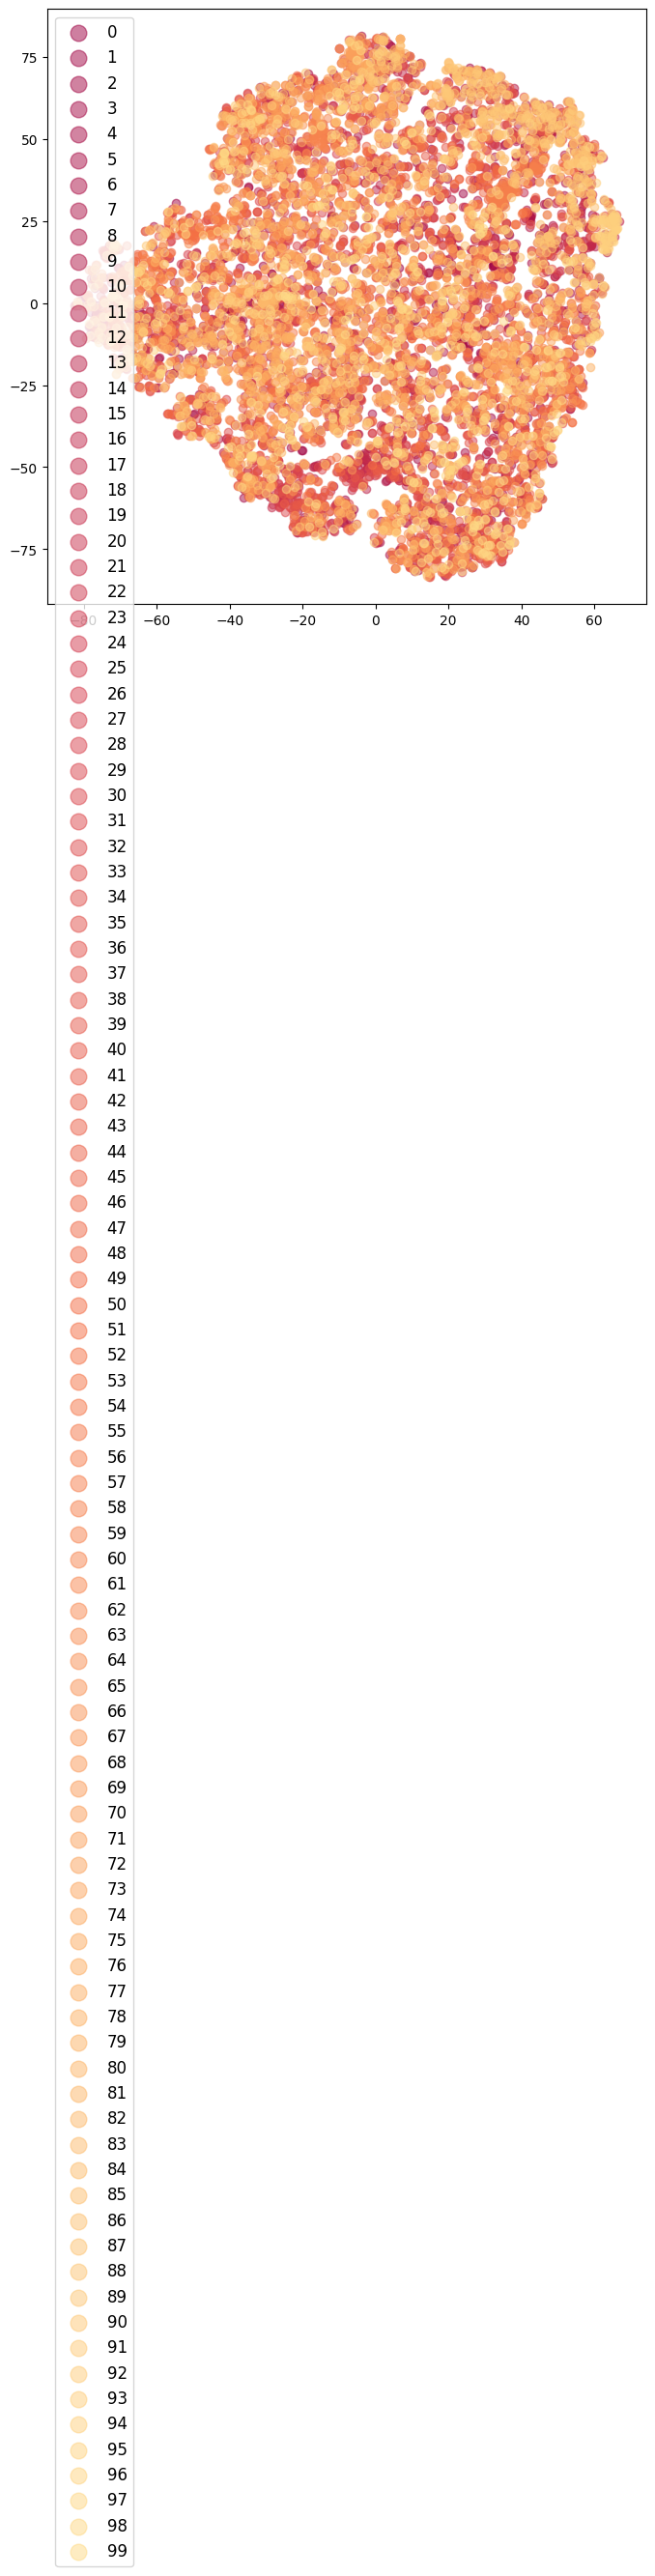

In [22]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(sl_features_ood)
# Plot those points as a scatter plot and label them based on the pred labels
# cmap = cm.get_cmap('tab20')
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 100
for lab in range(num_categories):
    indices = sl_labels ==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
plt.show()